In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
from matplotlib.image import imread
from sklearn.metrics import classification_report
#tensorflow modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data = "data/cell-images-for-detecting-malaria/cell_images/cell_images/"

In [ ]:
os.listdir(data)

['Uninfected', 'Parasitized']

In [ ]:
uninfected = len(os.listdir("data/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected"))
parasitized = len(os.listdir("data/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized"))
print("Uninfected: ",uninfected)
print("Parasitized: ", parasitized)

Uninfected:  13780
Parasitized:  13780


In [ ]:
parasitized_data = os.listdir("data/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized")

In [ ]:
sh=data+"/Parasitized"+"/C99P60ThinF_IMG_20150918_141001_cell_133.png"
print("Shape of image: ",imread(sh).shape)

Shape of image:  (145, 142, 3)


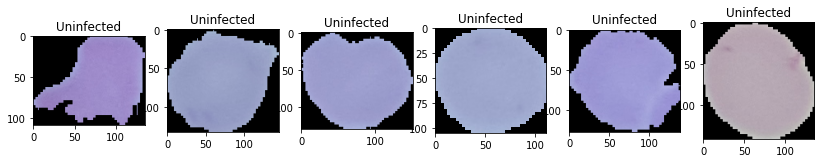

In [ ]:
#Images of Uninfected
plt.figure(figsize=(14,14))
import random, cv2
for i in range(6):
    plt.subplot(2,6,i+1)
    type1="Uninfected"
    imgdir = data+ type1
    imgfile = np.random.choice(os.listdir(imgdir))
    img = cv2.imread(imgdir+"/"+imgfile)
    plt.imshow(img)
    plt.title(type1)
plt.show()

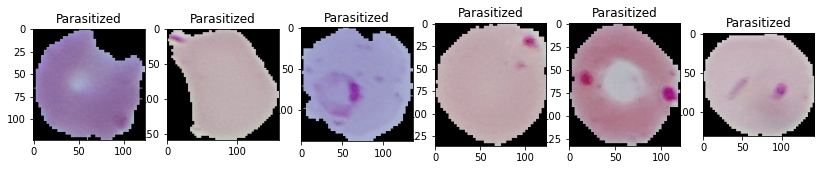

In [ ]:
#Images of Paratisitized
plt.figure(figsize=(14,14))
for i in range(6):
    plt.subplot(2,6,i+1)
    type2="Parasitized"
    imgdir = data+ type2
    imgfile = np.random.choice(os.listdir(imgdir))
    img = cv2.imread(imgdir+"/"+imgfile)
    plt.imshow(img)
    plt.title(type2)
plt.show()

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               shear_range=0.1,
                               fill_mode="nearest")

In [ ]:
train = tf.keras.preprocessing.image_dataset_from_directory(data,
                                                            validation_split=0.2,
                                                            seed=123,
                                                            subset="training",
                                                            image_size=(134,131),
                                                            batch_size=32)
test = tf.keras.preprocessing.image_dataset_from_directory(data,
                                                           validation_split=0.2,
                                                           seed=123,
                                                           subset="validation",
                                                           image_size=(134,131),
                                                           batch_size=32)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [ ]:
test.class_names

['Parasitized', 'Uninfected']

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(134,131,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(134,131,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(134,131,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=(134,131,3),activation='relu',padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 134, 131, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 67, 65, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 65, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       2

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",patience=5, verbose=True)

In [ ]:
history = model.fit(train,validation_data=test,epochs=10,callbacks=[early_stop],verbose=True)

Epoch 1/10
689/689 [==============================] - 251s 364ms/step - loss: 0.5688 - accuracy: 0.6780 - val_loss: 0.2102 - val_accuracy: 0.9225
Epoch 2/10
689/689 [==============================] - 95s 137ms/step - loss: 0.1669 - accuracy: 0.9492 - val_loss: 0.1401 - val_accuracy: 0.9534
Epoch 3/10
689/689 [==============================] - 95s 137ms/step - loss: 0.1448 - accuracy: 0.9550 - val_loss: 0.1420 - val_accuracy: 0.9575
Epoch 4/10
689/689 [==============================] - 96s 139ms/step - loss: 0.1331 - accuracy: 0.9571 - val_loss: 0.1582 - val_accuracy: 0.9555
Epoch 5/10
689/689 [==============================] - 95s 138ms/step - loss: 0.1269 - accuracy: 0.9589 - val_loss: 0.1450 - val_accuracy: 0.9521
Epoch 6/10
689/689 [==============================] - 94s 136ms/step - loss: 0.1267 - accuracy: 0.9590 - val_loss: 0.2001 - val_accuracy: 0.9352
Epoch 7/10
689/689 [==============================] - 106s 154ms/step - loss: 0.1183 - accuracy: 0.9604 - val_loss: 0.1594 - val_

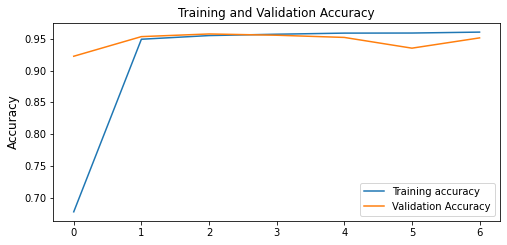

In [ ]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc,label="Training accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.show()

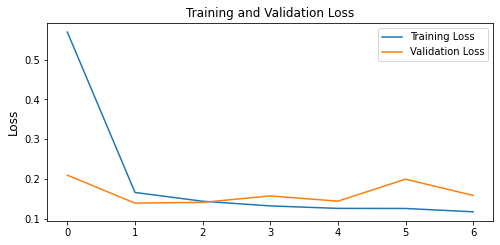

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(loss, label="Training Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss",fontsize=12)
plt.show()

In [ ]:
model.evaluate(test, verbose=1)

173/173 [==============================] - 18s 100ms/step - loss: 0.1594 - accuracy: 0.9514


[0.15941014885902405, 0.9513700008392334]

In [ ]:
from sklearn.metrics import accuracy_score
pred = model.predict_classes(test)

In [ ]:
pred[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]], dtype=int32)